# Hello Pose Estimation with Keypoint RCNN

In [7]:
# Prerequisites and dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

import torch
import torchvision.transforms as T
from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights

# !pip install torch torchvision torchaudio numpy matplotlib

### Functions for Main Tasks

In [8]:
def load_pose_estimation_model():
    """
    Load pretrained Keypoint R-CNN model from torchvision

    Returns:
        model (torch.nn.Module): loaded Keypoint R-CNN model
    """
    # Load model pre-trained with COCO keypoints
    weights = KeypointRCNN_ResNet50_FPN_Weights.DEFAULT

    model = keypointrcnn_resnet50_fpn(weights=weights)

    model.eval() # Set model to evaluation mode, disable dropout and batch normalization

    return model


def estimate_pose(model, image_file_path):
    """
    Perform pose estimation with the passed on model

    Args:
        model (torch.nn.Module): model to use for pose estimation
        image_file_path (str): file path to the image

    Returns:
        keypoints (list): Estimated keypoints for each detected human
        keypoints_scores (list): Confidence scores for the keypoints
    """

    # Load image
    image = Image.open(image_file_path).convert("RGB")
    image_tensor = T.functional.to_tensor(image).unsqueeze(0)

    # Perform inference
    with torch.no_grad():
        prediction = model(image_tensor)

    # predictions is a list of dictionaries with 'keypoints' and 'keypoints_scores'
    keypoints = prediction[0]['keypoints']
    keypoints_scores = prediction[0]['keypoints_scores']

    return keypoints, keypoints_scores 


def show_poses(image_file_path, keypoints, keypoints_scores, threshold=2.0):
    """
    Display original image with overlaied pose estimations

    Args:
        image_file_path (str): path to image file
        keypoints (list): estimated keypoints for each detected human
        keypoints_scores (list): confidence scores for the estimated keypoints.
        threshold (float): score threshold to to display keypoint
    """
    
    # Load and show the original image
    image = Image.open(image_file_path)
    plt.figure(figsize=(12, 12))
    plt.imshow(image)
    plt.axis('off')

    ax = plt.gca()

    for kp, kp_score in zip(keypoints, keypoints_scores):
        kp = kp.cpu().detach().numpy()
        kp_score = kp_score.cpu().detach().numpy()
        # Draw keypoints
        for idx, (x, y, v) in enumerate(kp):
            if kp_score[idx] > threshold:
                ax.add_patch(plt.Circle((x, y), radius=5, color='red'))

    plt.show()
    

### Perform Detection

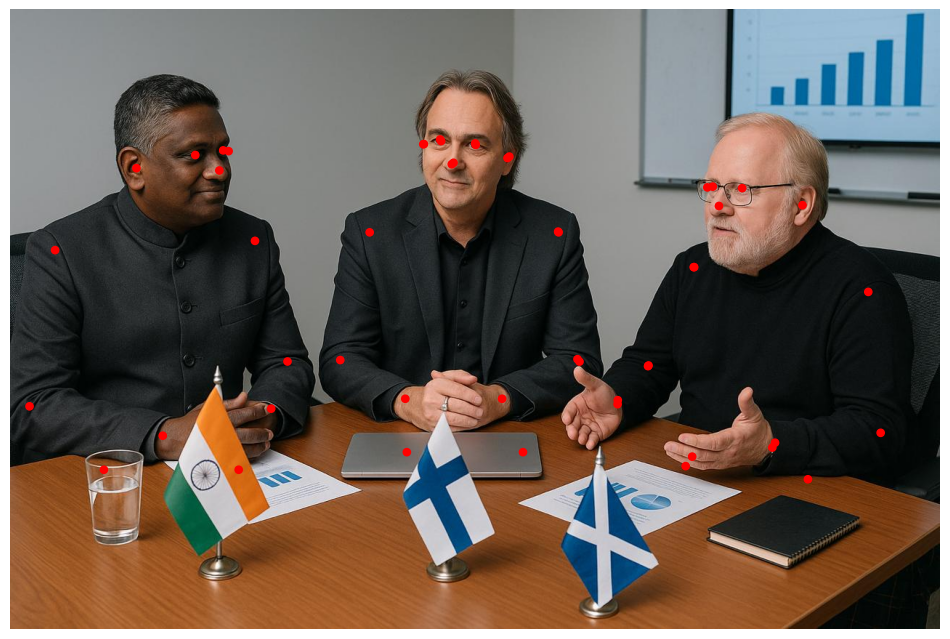

In [9]:
# Load YOLOv5
model = load_pose_estimation_model()

# Load image
image_file_path = "images/meeting.jpg"

# Perform Pose Estimation
keypoints, keypoints_scores = estimate_pose(model, image_file_path)

# Show results
show_poses(image_file_path, keypoints, keypoints_scores)
